In [86]:
# Project 8: Survey Data Visualization Project
# Problem Statement: Survey results are often under-utilized due to poor analysis.

# Data Visualization with Python Seaborn Library

In [87]:
# Data visualization is a very important step for understanding data patterns and relationships between variables quickly and clearly.
# Matplotlib and Seaborn are probably the most popular libraries of Python used for data visualization.

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import scipy as sp

In [89]:
sns.set_theme()

In [90]:
df = pd.read_csv("E:/AICTE Intern Tasks/RISE/Datasets/8_Survey.csv")

In [91]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [92]:
df.shape

(4572, 5)

In [93]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [95]:
df.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [96]:
# statistical data of numerical values
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [97]:
# mean of sales volume are greatest among the numerical variables. 
# Mean of TV's budget is second place with around 54 million. 
# Radio's is in the third place and social media's mean is lowest among them with around 3.3 million. 

In [98]:
df['Influencer'].value_counts()

Influencer
Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: count, dtype: int64

In [99]:
# check for null values
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [100]:
# instead of filling null values simply drop them
df=df.dropna()

In [101]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

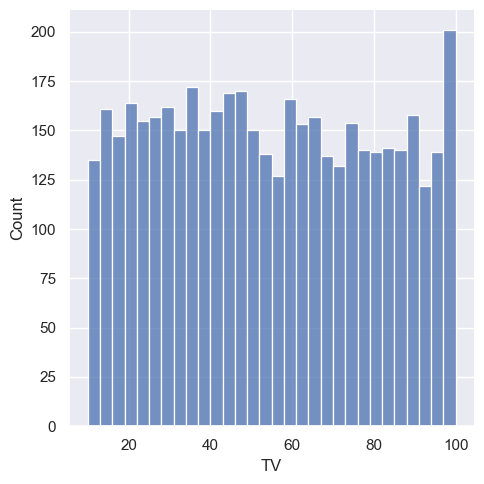

In [102]:
# Data Visualization Functions
# Distplot shows distribution of continuous data variables

#sns.distplot(df['TV'],kde=False, bins=30 )
sns.displot(df['TV'], bins=30, kde=False)

<Axes: xlabel='Radio', ylabel='Count'>

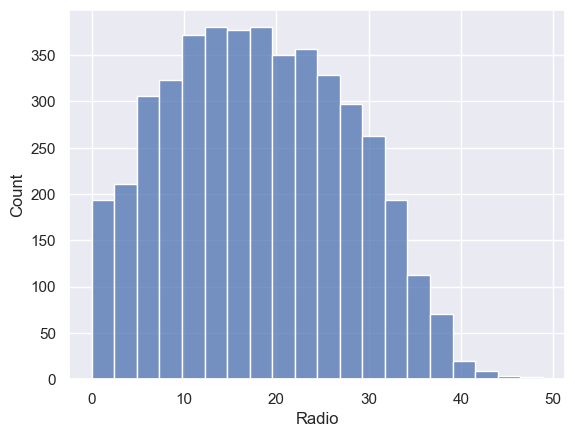

In [103]:
sns.histplot(df['Radio'], bins=20, kde=False)

<Axes: xlabel='Social Media', ylabel='Count'>

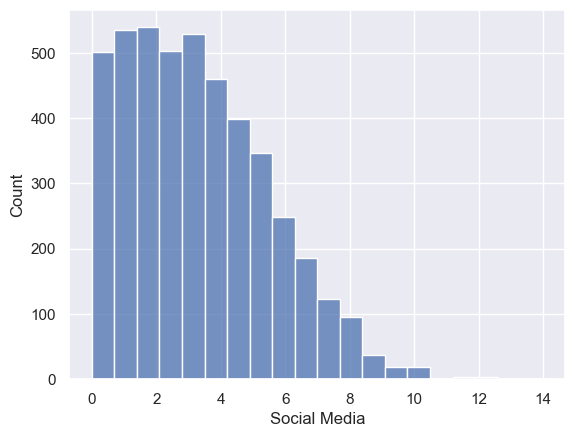

In [104]:
sns.histplot(df['Social Media'], kde=False, bins=20)

<Axes: xlabel='Sales', ylabel='Count'>

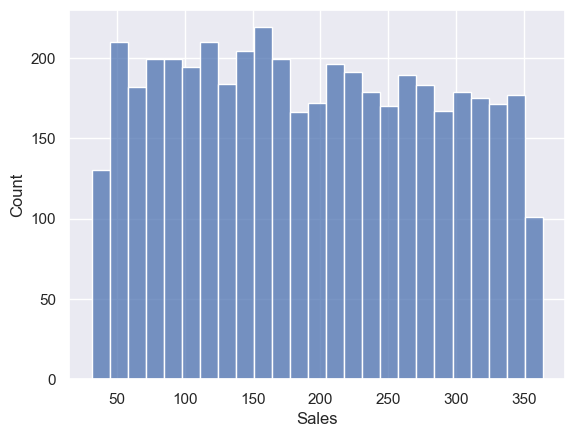

In [105]:
sns.histplot(df['Sales'],kde=False,bins=25)

In [106]:
# You can change bin size to change the detail level of data representation

# Now visualize relationships between variables. I will check pairwise correlations of all numerical variables in our dataset.
df.corr(numeric_only=True)

,TV,Radio,Social Media,Sales
TV,1.000000,0.869158,0.527687,0.999497
Radio,0.869158,1.000000,0.606338,0.868638
Social Media,0.527687,0.606338,1.000000,0.527446
Sales,0.999497,0.868638,0.527446,1.000000


In [107]:
# Pandas corr() function gives Pearson r values. When we look at r values, TV & sales varibles show highest positive correlation among the pairs. 
# Also, TV-Radio & Radio-Sales pairs show high positive correlation. Social media pairs also show significant positive correlation with other variables.

<Axes: >

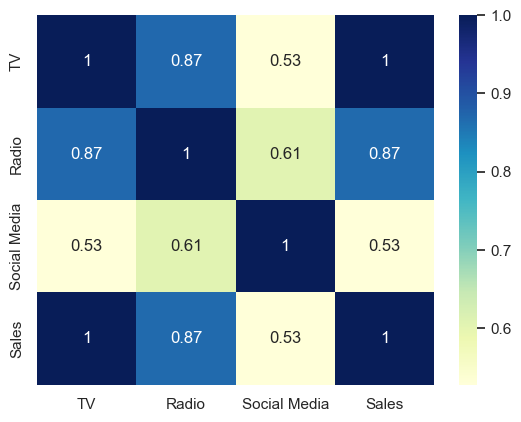

In [108]:
# use heatmap to visualize the correlation values between variables

sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='YlGnBu')

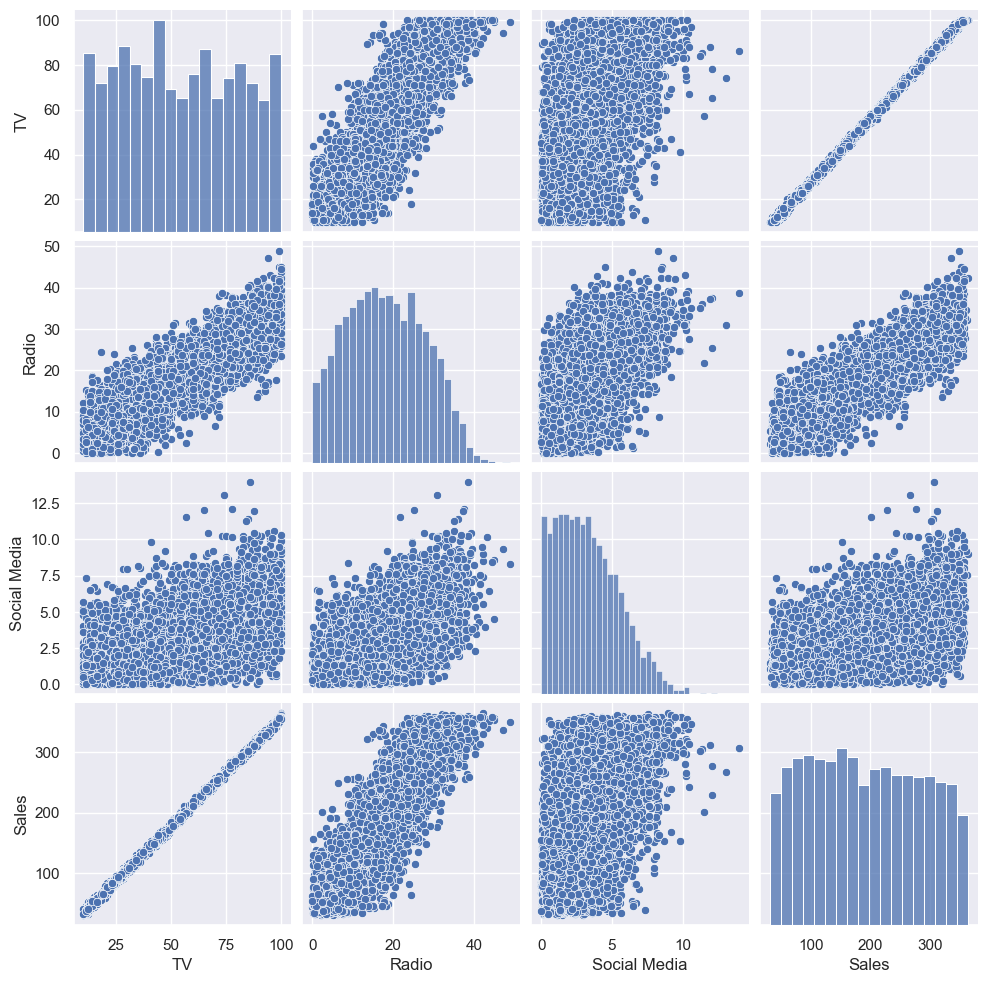

In [109]:
# use pairplot to show pairwise relationships between variables
sns.pairplot(df)

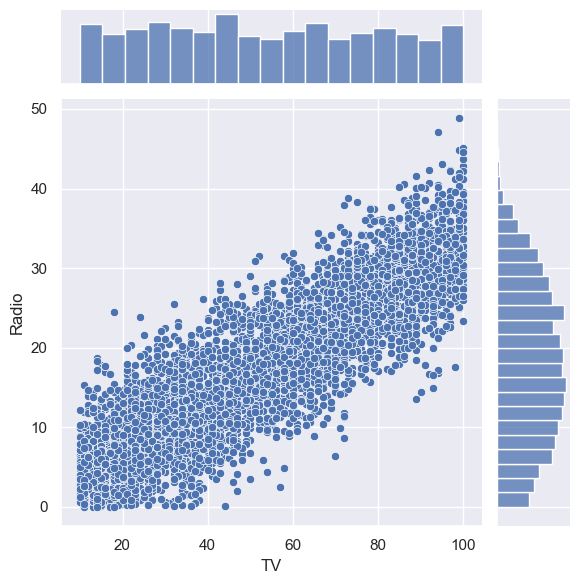

In [110]:
# use seaborn also to draw the variables with statistical values together 

g = sns.jointplot(x='TV',y='Radio',data=df, kind='scatter')

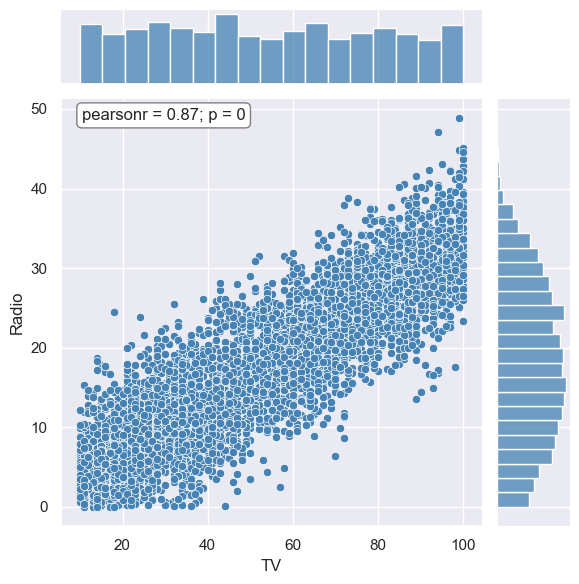

In [119]:
# Calculate Pearson correlation
r, p = stats.pearsonr(df['TV'], df['Radio'])
g = sns.jointplot(x='TV', y='Radio', data=df, kind='scatter', color='steelblue')

# Add annotation manually on the plot
plt.annotate(f'pearsonr = {r:.2f}; p = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'))

plt.show()

# p value is less than 0.05, it means that correlation between TV & Radio is statistically significant.

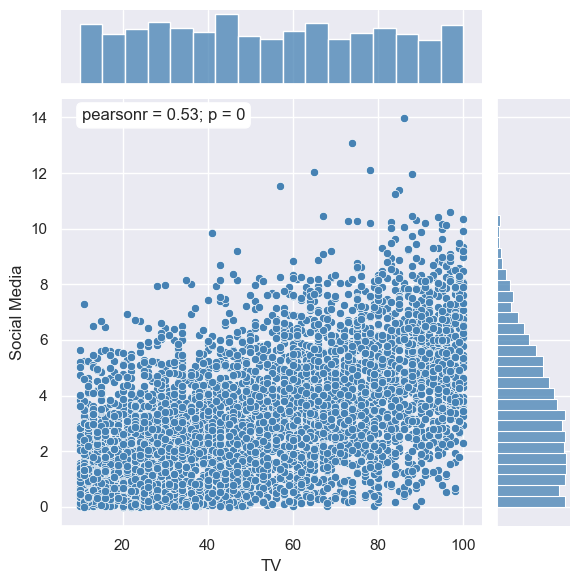

In [120]:
# Calculate Pearson correlation
r, p = stats.pearsonr(df['TV'], df['Social Media'])
g = sns.jointplot(x='TV', y='Social Media', data=df, kind='scatter', color='steelblue')

# g.ax_joint gives you access to the main scatter plot axes
g.ax_joint.annotate(f'pearsonr = {r:.2f}; p = {p:.2g}',
                    xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=12, bbox=dict(boxstyle="round", fc="w"))

plt.show()

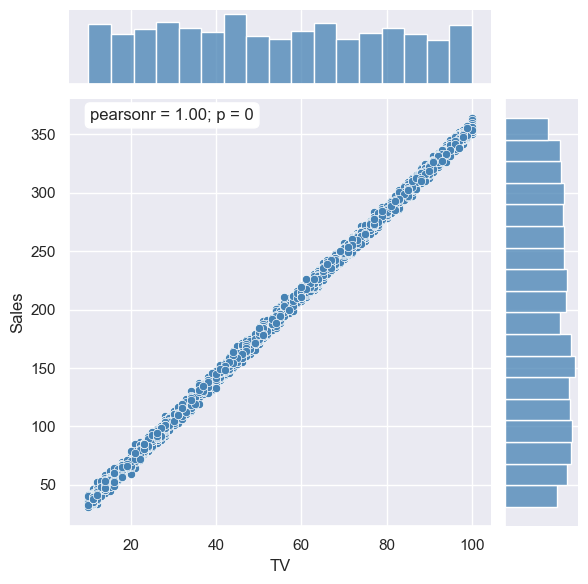

In [121]:
r, p = stats.pearsonr(df['TV'], df['Sales'])
g = sns.jointplot(x='TV', y='Sales', data=df, kind='scatter', color='steelblue')
g.ax_joint.annotate(f'pearsonr = {r:.2f}; p = {p:.2g}',
                    xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=12, bbox=dict(boxstyle="round", fc="w"))

plt.show()


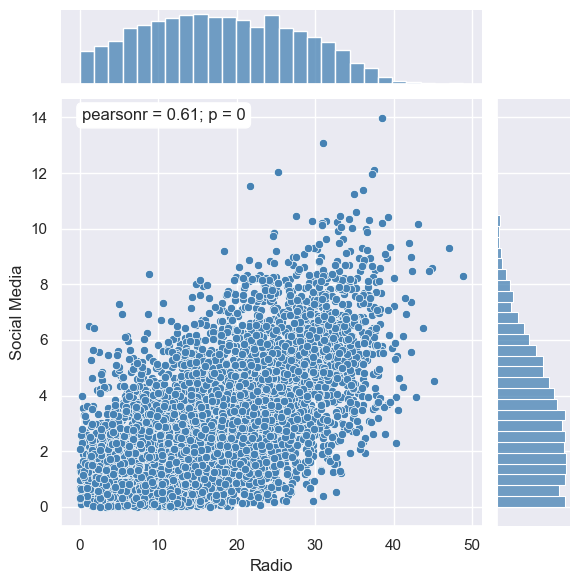

In [122]:
r, p = stats.pearsonr(df['Radio'], df['Social Media'])
g = sns.jointplot(x='Radio', y='Social Media', data=df, kind='scatter', color='steelblue')
g.ax_joint.annotate(f'pearsonr = {r:.2f}; p = {p:.2g}',
                    xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=12, bbox=dict(boxstyle="round", fc="w"))

plt.show()

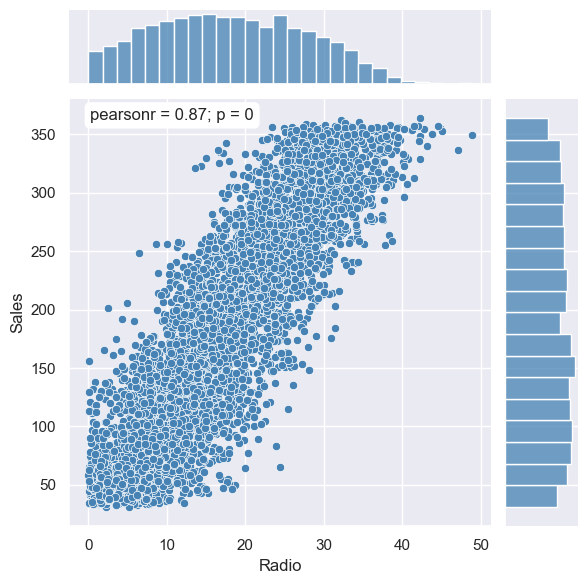

In [123]:
r, p = stats.pearsonr(df['Radio'], df['Sales'])
g = sns.jointplot(x='Radio', y='Sales', data=df, kind='scatter', color='steelblue')
g.ax_joint.annotate(f'pearsonr = {r:.2f}; p = {p:.2g}',
                    xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=12, bbox=dict(boxstyle="round", fc="w"))

plt.show()

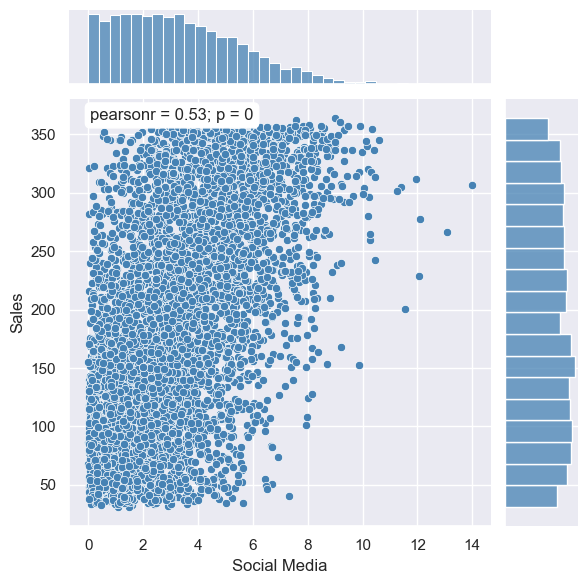

In [124]:
r, p = stats.pearsonr(df['Social Media'], df['Sales'])
g = sns.jointplot(x='Social Media', y='Sales', data=df, kind='scatter', color='steelblue')
g.ax_joint.annotate(f'pearsonr = {r:.2f}; p = {p:.2g}',
                    xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=12, bbox=dict(boxstyle="round", fc="w"))

plt.show()

<Axes: xlabel='Influencer', ylabel='count'>

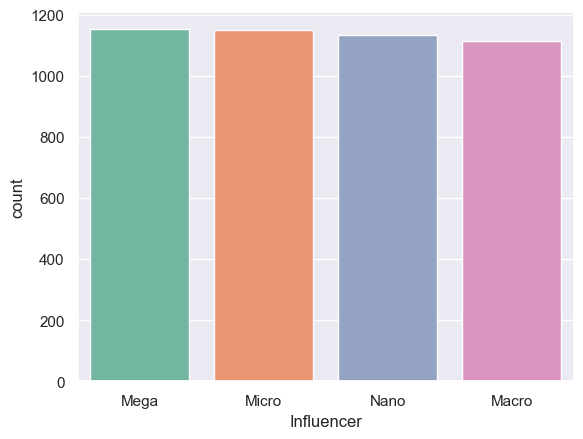

In [140]:
# explore the relations with the categorical variable 'Influencer'
sns.countplot(x='Influencer', hue='Influencer', data=df, palette='Set2', legend=False)

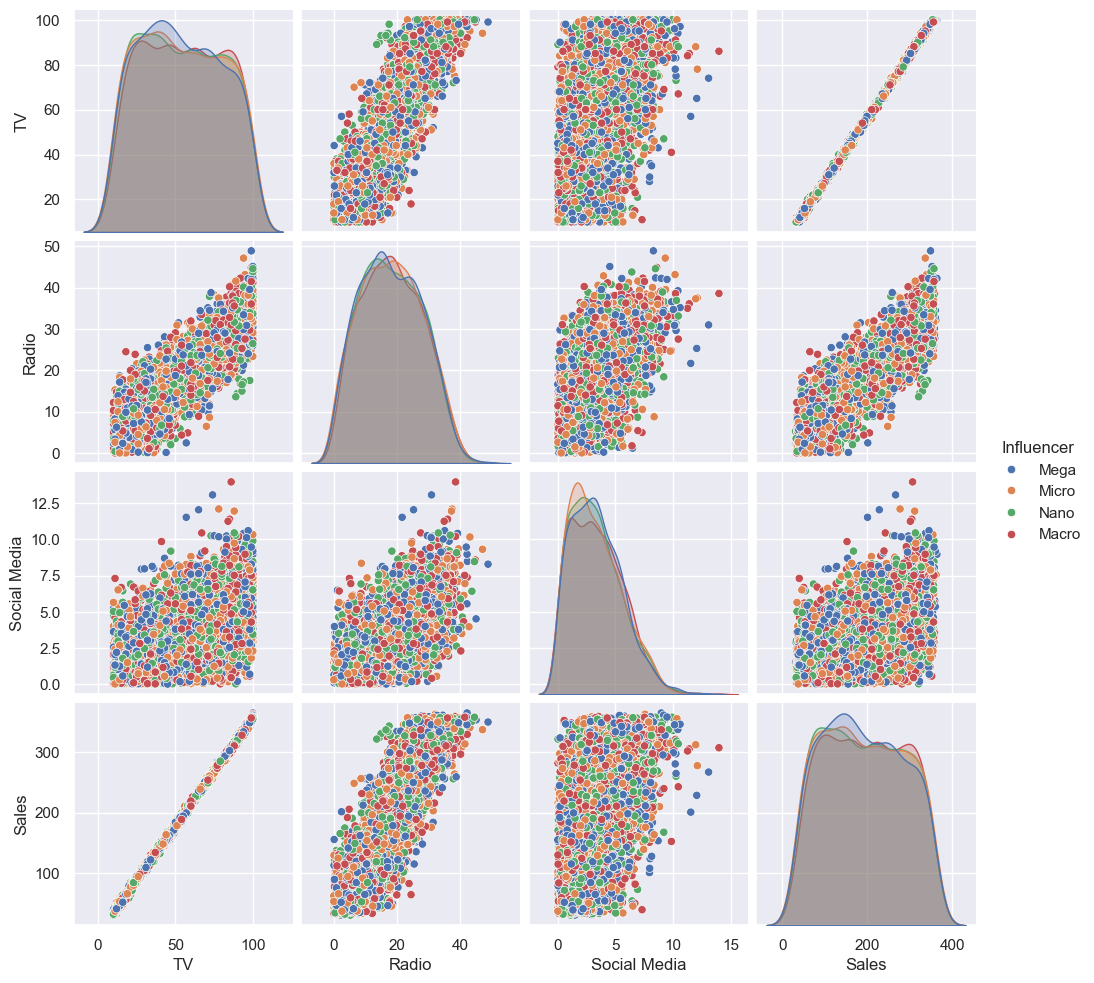

In [141]:
# pairplot with using hue= 'Influencer' line to make data visualization distinguishing categorical variables with different colors
sns.pairplot(df,hue= 'Influencer', kind='scatter')

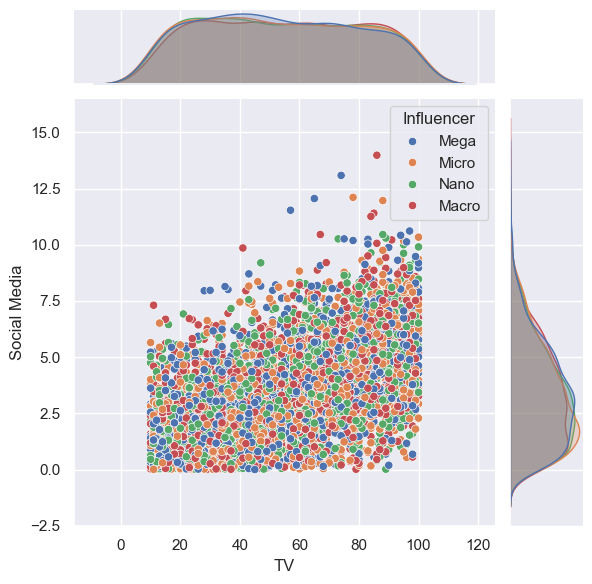

In [142]:
# The categorical variables seem distributed homogeneously, we can look at the pair relations and Influencer categories with using jointplots again 
sns.jointplot(x='TV',y='Social Media',hue='Influencer',data=df)

<Axes: xlabel='TV', ylabel='Radio'>

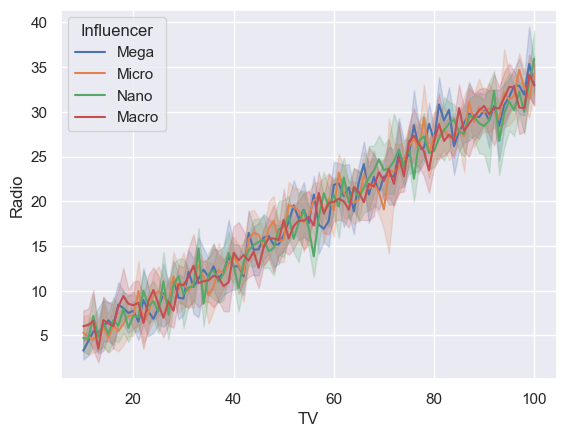

In [143]:
sns.lineplot(data=df, x='TV', y='Radio', hue ='Influencer')    

<Axes: xlabel='Influencer', ylabel='TV'>

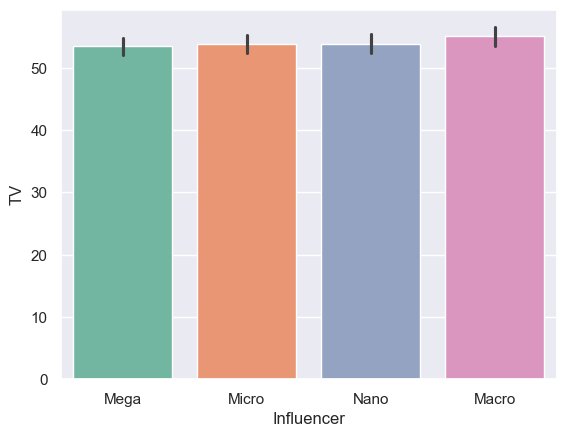

In [144]:
sns.barplot(data=df, x='Influencer', y='TV', hue='Influencer', palette='Set2', dodge=False, legend=False)

<Axes: xlabel='Influencer', ylabel='Radio'>

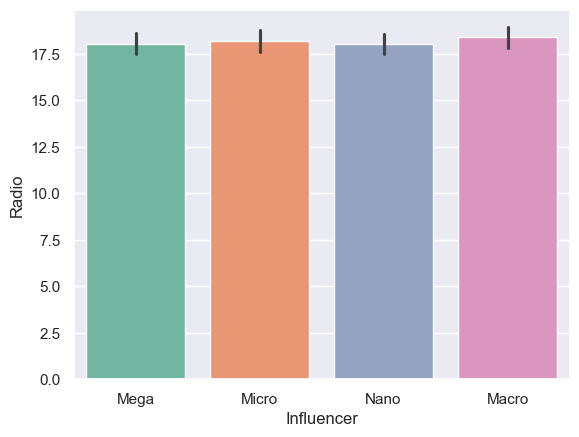

In [145]:
sns.barplot(data=df, x='Influencer', y='Radio', hue='Influencer', palette='Set2', dodge=False, legend=False)

<Axes: xlabel='Influencer', ylabel='Social Media'>

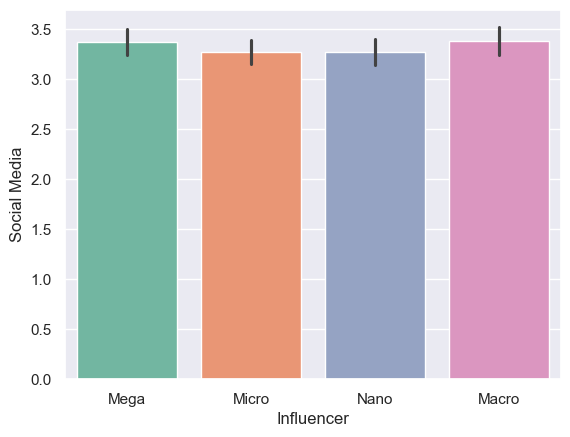

In [146]:
sns.barplot(data=df, x='Influencer', y='Social Media', hue='Influencer', palette='Set2', dodge=False, legend=False)

<Axes: xlabel='Influencer', ylabel='Sales'>

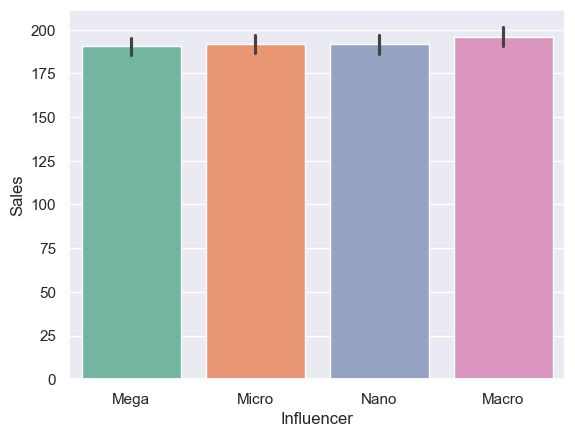

In [147]:
sns.barplot(data=df, x='Influencer', y='Sales', hue='Influencer', palette='Set2', dodge=False, legend=False)

<Axes: xlabel='Influencer', ylabel='TV'>

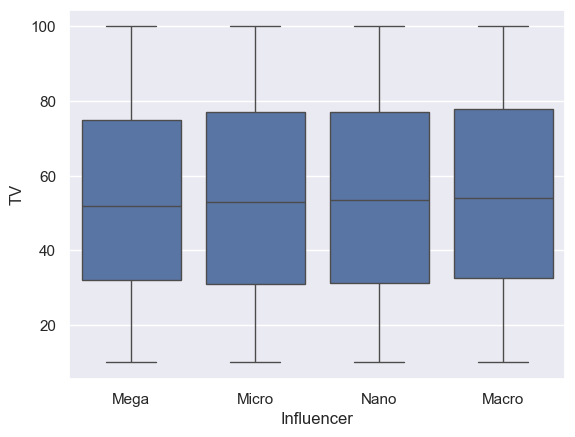

In [136]:
sns.boxplot(data=df, x='Influencer',y='TV')
sns.boxplot(data=df, x='Influencer', y='TV', hue='Influencer', palette='Set2', dodge=False, legend=False)


In [ ]:
S